###Import

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from matplotlib import cm
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from scipy.stats import skew, kurtosis, normaltest, shapiro, probplot, boxcox
from tabulate import tabulate

###Read

In [ ]:
import io

url = "Wholesale customers data.csv"
import requests
response = requests.get(url)

df = pd.read_csv(io.StringIO(response.text))

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [ ]:
#REGION	Frequency
#Lisbon	77
#Oporto	47
#Other Region	316
#Total	440

#CHANNEL	Frequency
#Horeca	298
#Retail	142
#Total	440

###Explore

In [ ]:
df.shape

(440, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [ ]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
np.random.seed(2017)
indices = np.random.randint(low = 0, high = 441, size = 3)
print("Indices of Samples => {}".format(indices))

samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("\nChosen samples of wholesale customers dataset:")
display(samples)

Indices of Samples => [ 59   9 141]

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6137,5360,8040,129,3084,1603
1,6006,11093,18881,1159,7425,2098
2,30379,13252,5189,321,51,1450


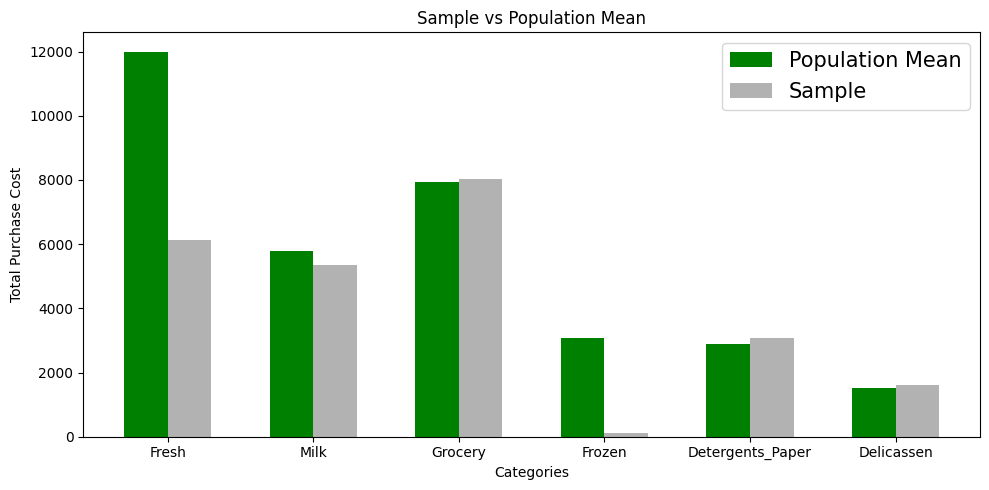

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(samples.shape[1])
bar_width = 0.3
opacity_pop = 1
opacity_sample = 0.3

rect1 = ax.bar(index, df.mean(), bar_width,
                alpha=opacity_pop, color='g',
                label='Population Mean')

rect2 = ax.bar(index + bar_width, samples.iloc[0], bar_width,
                alpha=opacity_sample, color='k',
                label='Sample')

ax.set_xlabel('Categories')
ax.set_ylabel('Total Purchase Cost')
ax.set_title('Sample vs Population Mean')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(samples.columns)
ax.legend(loc=0, prop={'size': 15})

fig.tight_layout()
plt.show()

In [ ]:
samples.iloc[0] - df.mean()

Fresh              -5863.297727
Milk                -436.265909
Grocery               88.722727
Frozen             -2942.931818
Detergents_Paper     202.506818
Delicassen            78.129545
dtype: float64

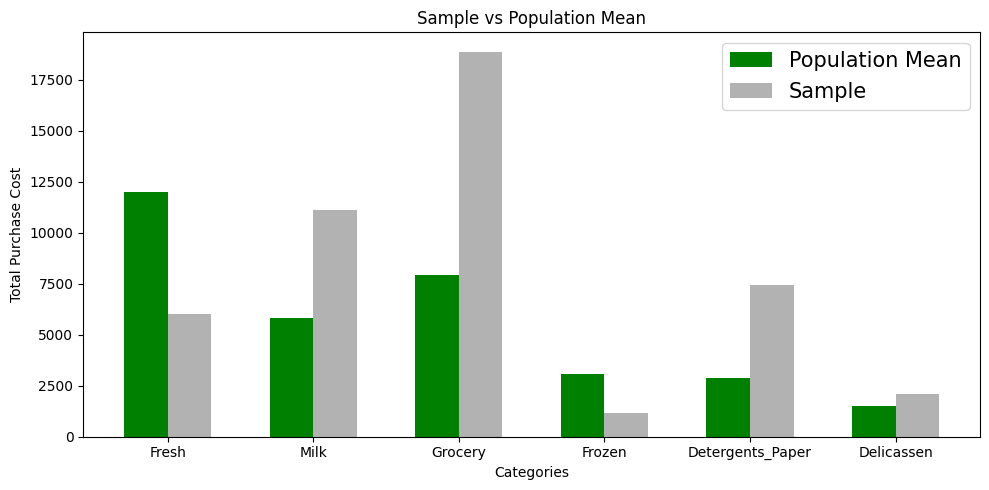

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(samples.shape[1])
bar_width = 0.3
opacity_pop = 1
opacity_sample = 0.3

rect1 = ax.bar(index, df.mean(), bar_width,
                alpha=opacity_pop, color='g',
                label='Population Mean')

rect2 = ax.bar(index + bar_width, samples.iloc[1], bar_width,
                alpha=opacity_sample, color='k',
                label='Sample')

ax.set_xlabel('Categories')
ax.set_ylabel('Total Purchase Cost')
ax.set_title('Sample vs Population Mean')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(samples.columns)
ax.legend(loc=0, prop={'size': 15})

fig.tight_layout()
plt.show()

In [ ]:
samples.iloc[1] - df.mean()

Fresh               -5994.297727
Milk                 5296.734091
Grocery             10929.722727
Frozen              -1912.931818
Detergents_Paper     4543.506818
Delicassen            573.129545
dtype: float64

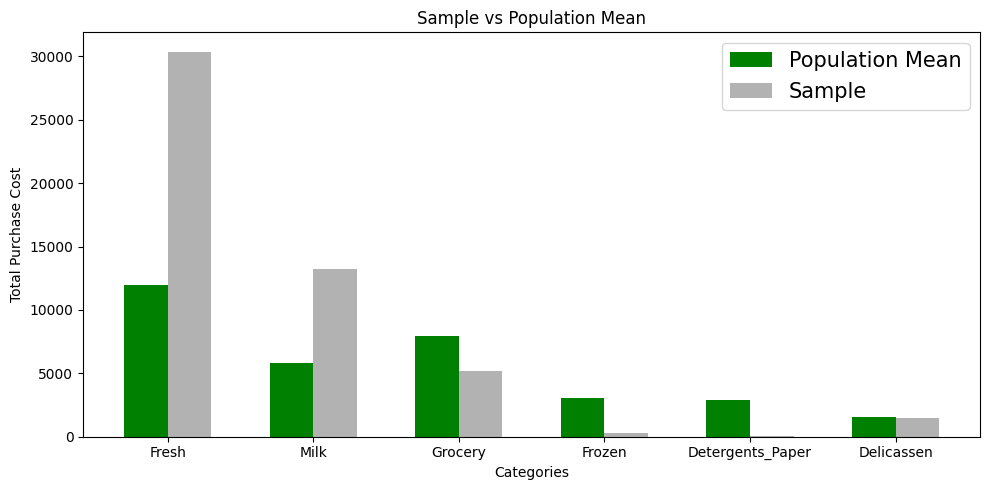

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

index = np.arange(samples.shape[1])
bar_width = 0.3
opacity_pop = 1
opacity_sample = 0.3

rect1 = ax.bar(index, df.mean(), bar_width,
                alpha=opacity_pop, color='g',
                label='Population Mean')

rect2 = ax.bar(index + bar_width, samples.iloc[2], bar_width,
                alpha=opacity_sample, color='k',
                label='Sample')

ax.set_xlabel('Categories')
ax.set_ylabel('Total Purchase Cost')
ax.set_title('Sample vs Population Mean')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(samples.columns)
ax.legend(loc=0, prop={'size': 15})

fig.tight_layout()
plt.show()

In [ ]:
samples.iloc[2] - df.mean()

Fresh               18378.702273
Milk                 7455.734091
Grocery             -2762.277273
Frozen              -2750.931818
Detergents_Paper    -2830.493182
Delicassen            -74.870455
dtype: float64

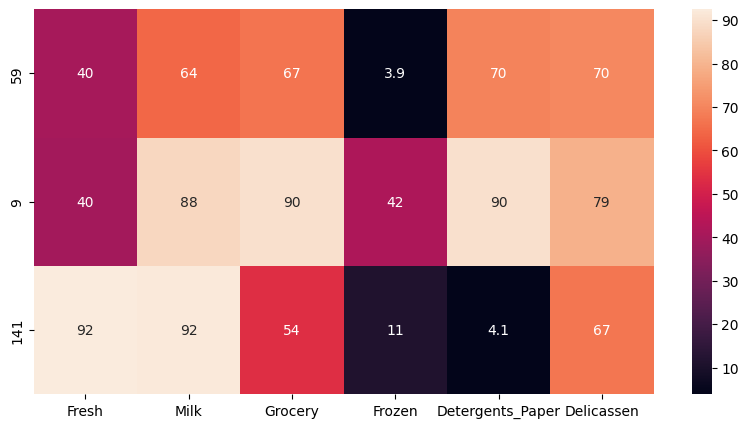

In [ ]:
percentiles_data = 100*df.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
plt.subplots(figsize=(10,5))
_ = sns.heatmap(percentiles_samples, annot=True)

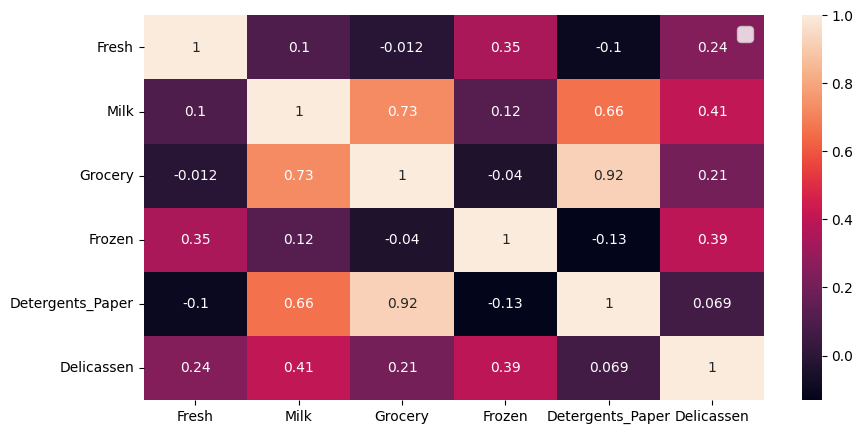

In [ ]:
corr = df.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 15})

###Visualize

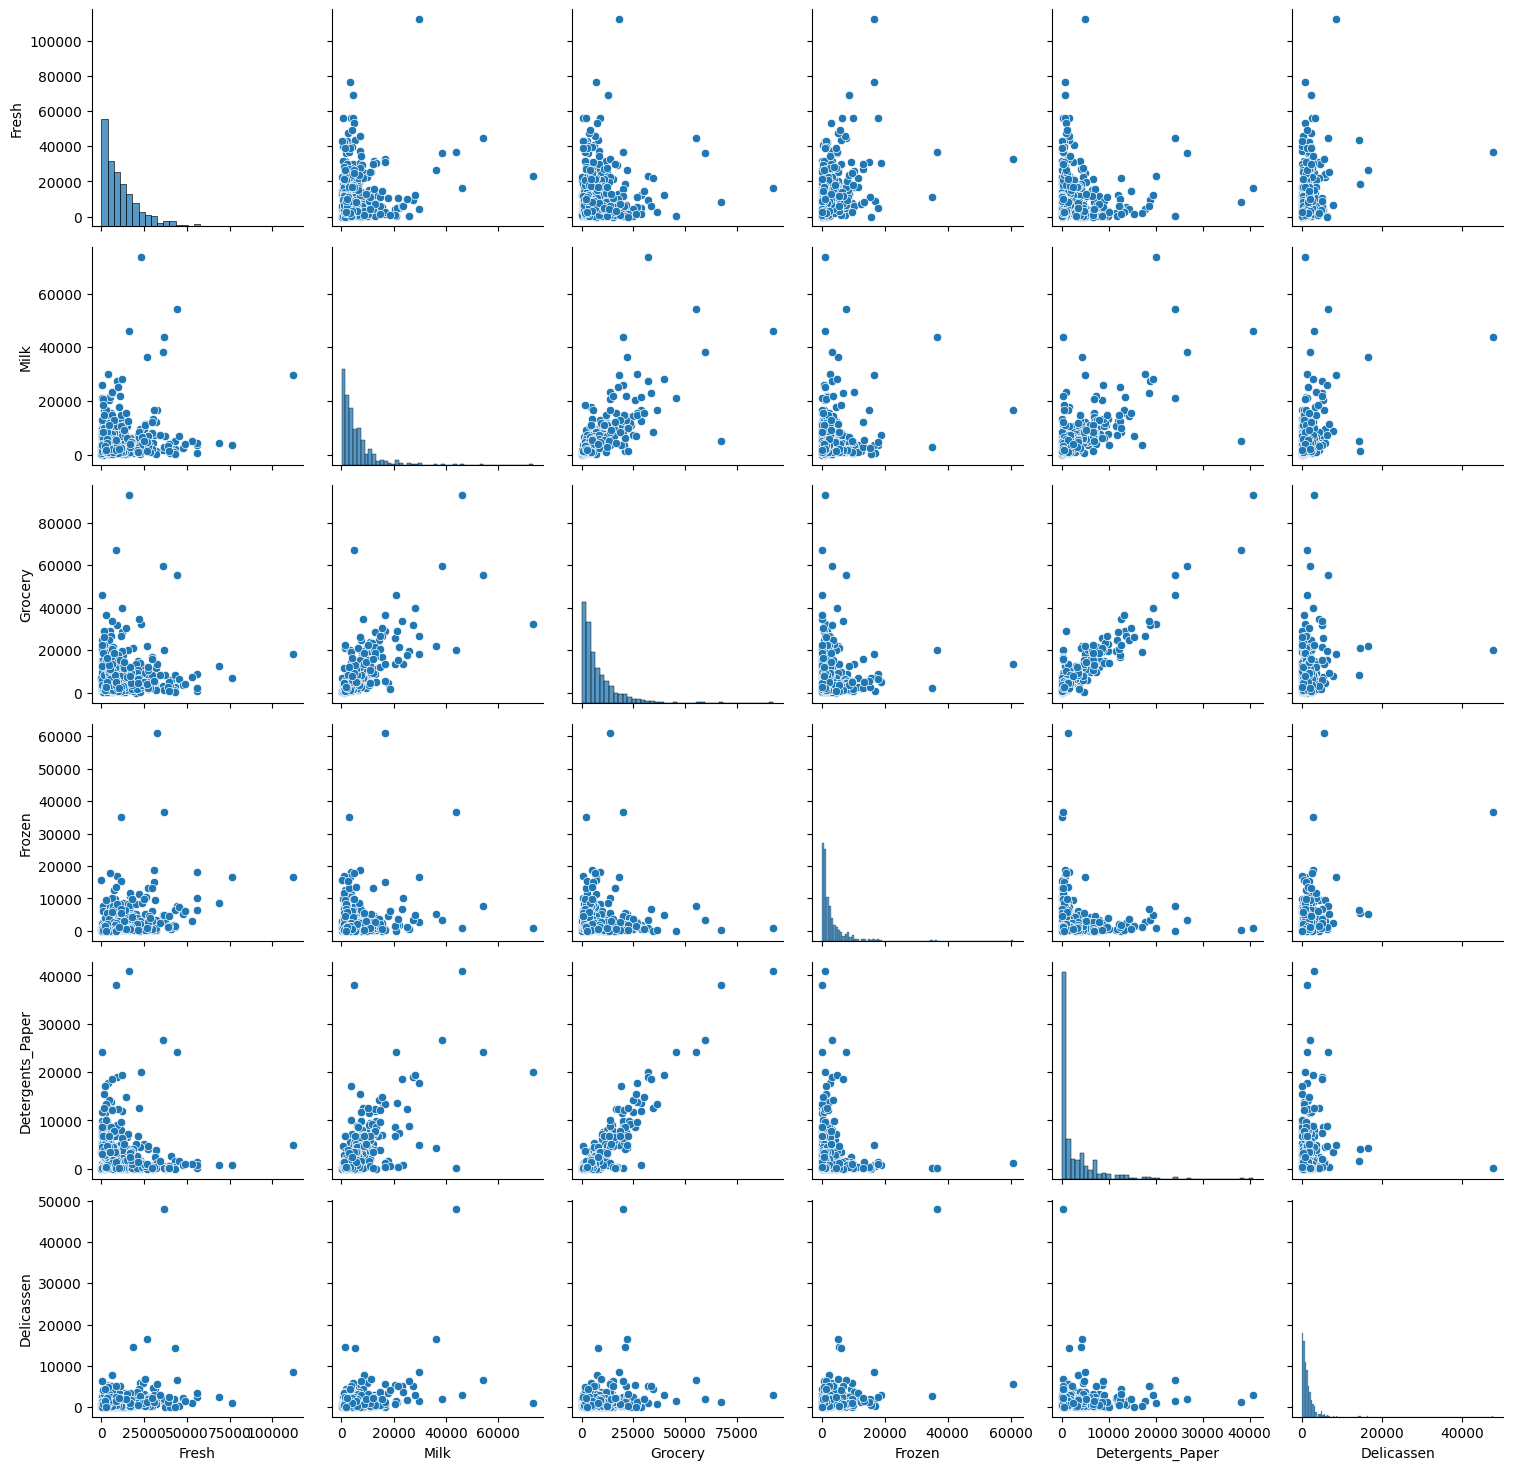

In [ ]:
g = sns.PairGrid(df, palette="Spectral")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

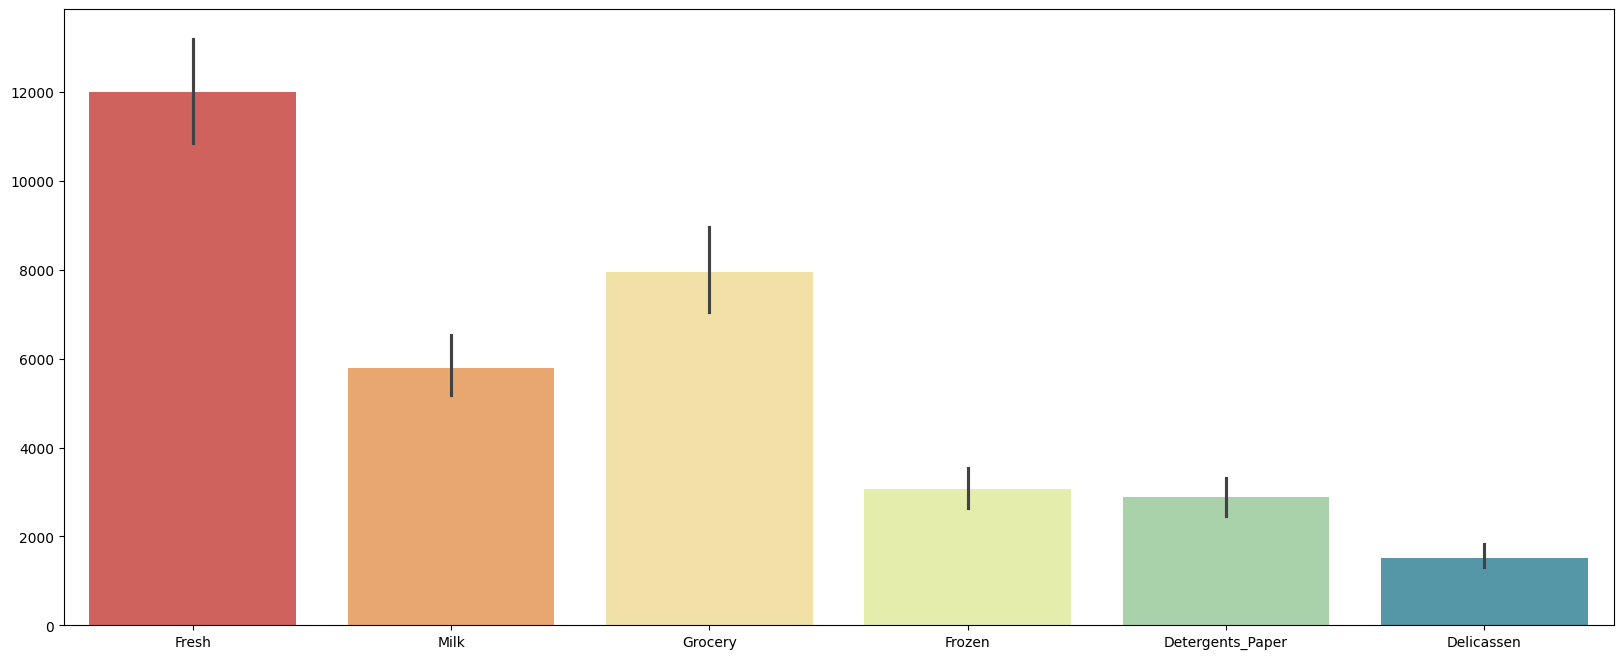

In [ ]:
plt.figure(figsize = (20,8))
_ = sns.barplot(data=df, palette="Spectral")

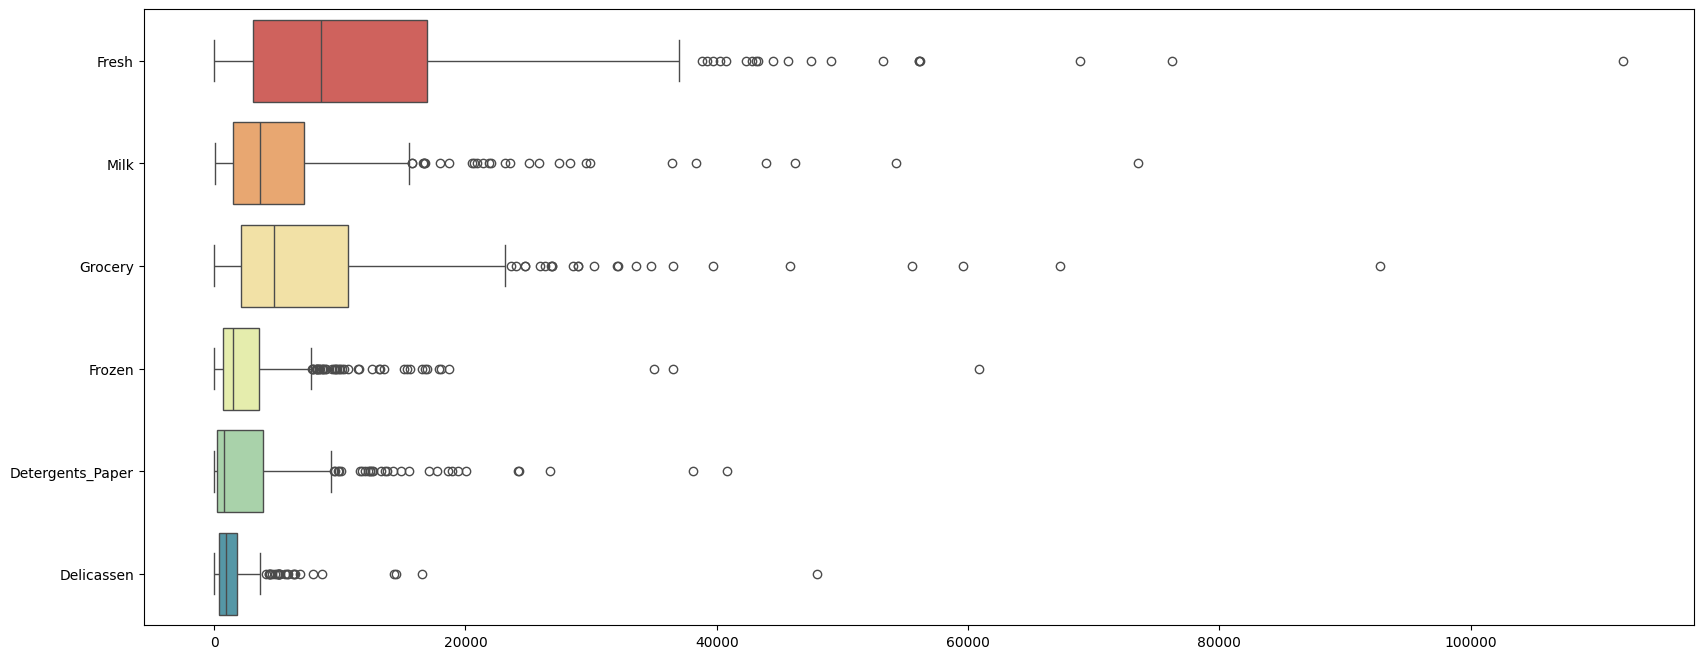

In [ ]:
plt.figure(figsize = (20,8))
_ = sns.boxplot(data=df, orient='h', palette="Spectral")

###Preprocessing

####Skewness & Kurtosis

In [ ]:
skewness = df.skew()
kurtosisness = df.kurtosis()

headers = ['Variable', 'Shapiro Test', 'Skewness Coefficient', 'Skewness', 'Kurtosis Coefficient', 'Kurtosis']

table_data = []
for col in df.columns:
    stat, p = normaltest(df[col])
    normal_dist = 'Yes' if p >= 0.05 else 'No'
    skewness_val = f'{skewness[col]:.4f}'
    skewness_desc = 'Highly skewed' if skewness[col] < -1 or skewness[col] > 1 else 'Symmetric or mildly skewed'
    kurtosis_val = f'{kurtosisness[col]:.4f}'
    kurtosis_desc = 'Very flat or sharp' if kurtosisness[col] < -2 or kurtosisness[col] > 2 else 'Normal or mildly flat'

    stat_sh, p_sh = shapiro(df[col])
    shapiro_test = 'Yes' if p_sh >= 0.05 else 'No'

    table_data.append([col, shapiro_test, skewness_val, skewness_desc, kurtosis_val, kurtosis_desc])

table = tabulate(table_data, headers, tablefmt='pretty')
print(table)

+------------------+--------------+----------------------+---------------+----------------------+--------------------+
|     Variable     | Shapiro Test | Skewness Coefficient |   Skewness    | Kurtosis Coefficient |      Kurtosis      |
+------------------+--------------+----------------------+---------------+----------------------+--------------------+
|      Fresh       |      No      |        2.5613        | Highly skewed |       11.5364        | Very flat or sharp |
|       Milk       |      No      |        4.0538        | Highly skewed |       24.6694        | Very flat or sharp |
|     Grocery      |      No      |        3.5874        | Highly skewed |       20.9147        | Very flat or sharp |
|      Frozen      |      No      |        5.9080        | Highly skewed |       54.6893        | Very flat or sharp |
| Detergents_Paper |      No      |        3.6319        | Highly skewed |       19.0095        | Very flat or sharp |
|    Delicassen    |      No      |       11.151

In [ ]:
normality=pd.DataFrame(index=['p-value', 'test-statistic'])
for i in df.columns:
    normality[i]=shapiro(df[i])

normality.T

,p-value,test-statistic
Fresh,0.781436,7.918438e-24
Milk,0.628334,9.762062e-30
Grocery,0.676230,3.906127e-28
Frozen,0.528297,1.291332e-32
Detergents_Paper,0.605482,1.914593e-30
Delicassen,0.361068,1.753408e-36


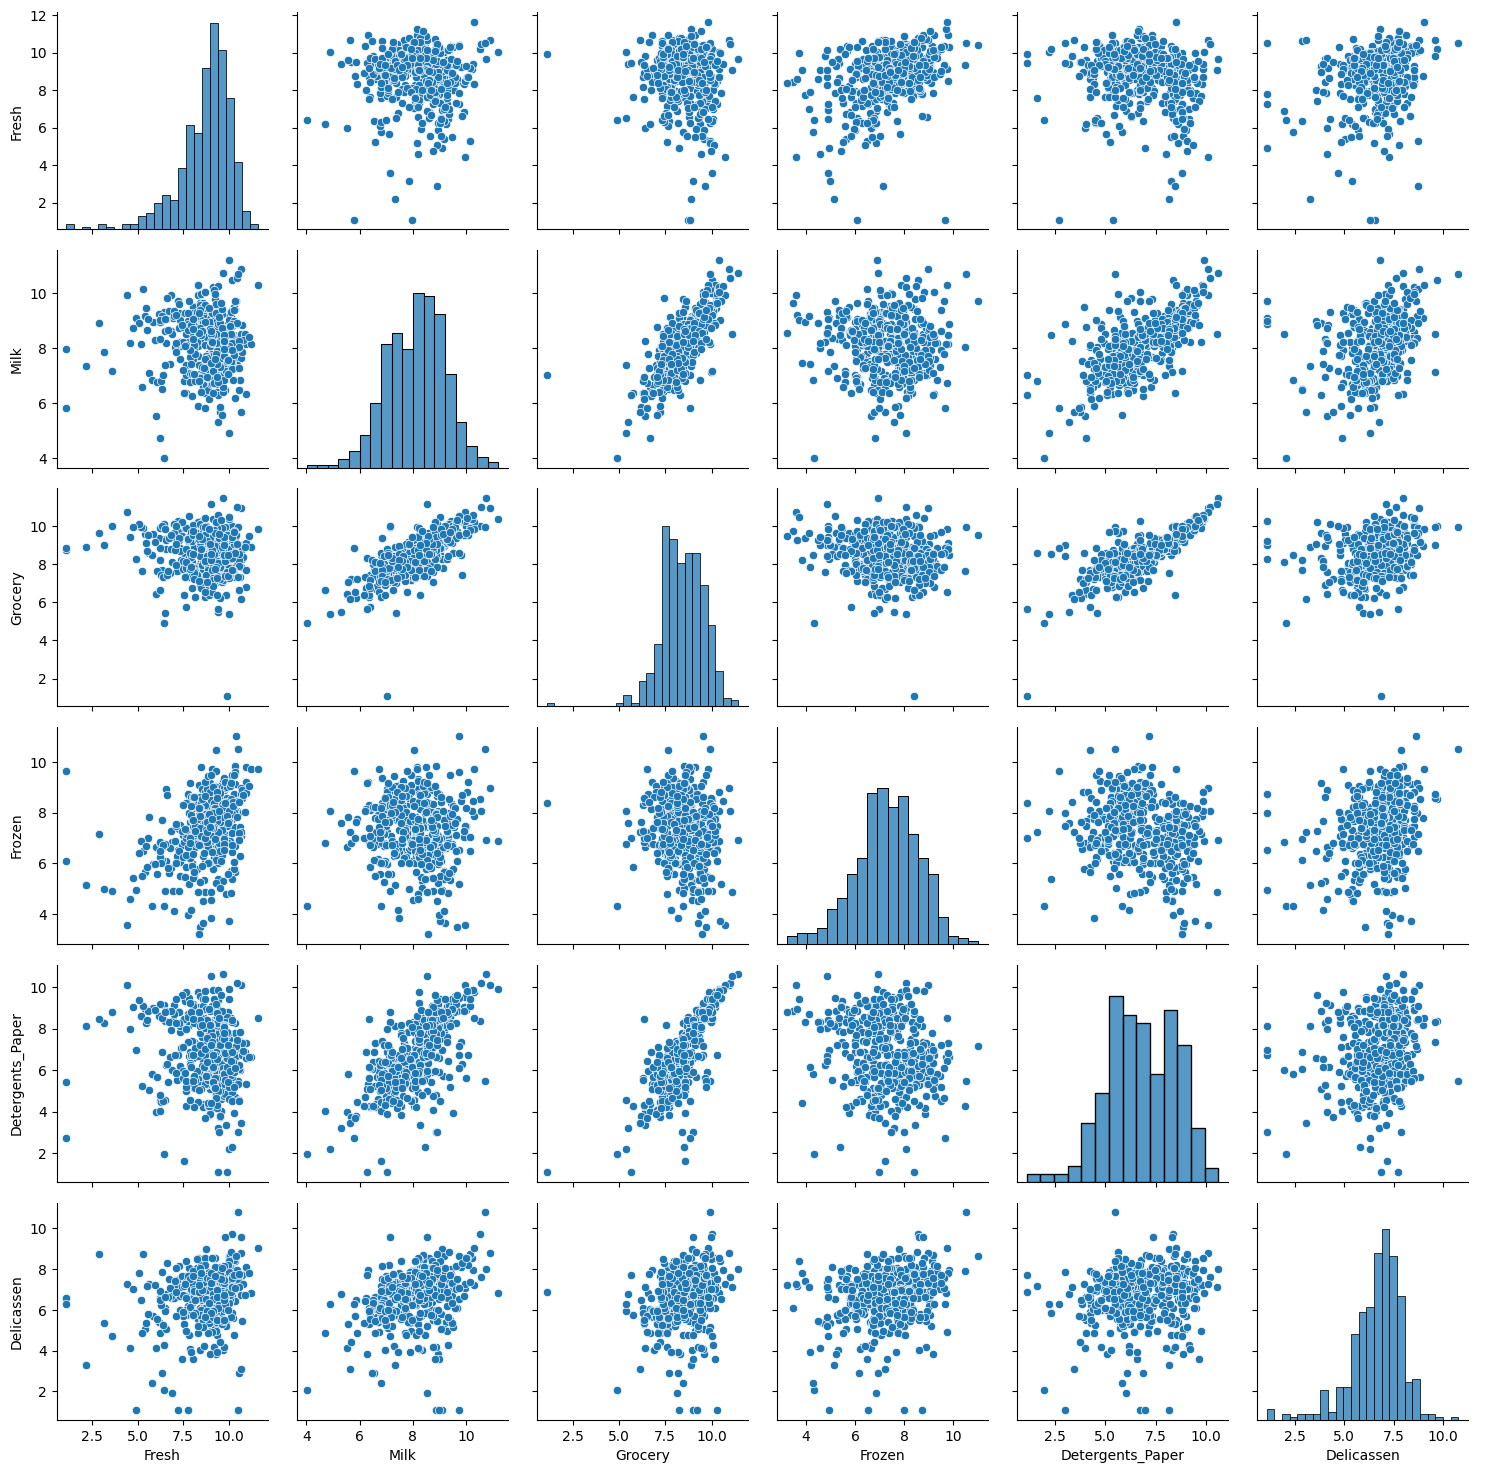

In [ ]:
log_data = np.log(df)
log_samples = np.log(samples)
g = sns.PairGrid(log_data, palette="Spectral")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8.722091,8.586719,8.992184,4.859812,8.033983,7.379632
1,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740
2,10.321507,9.491904,8.554296,5.771441,3.931826,7.279319


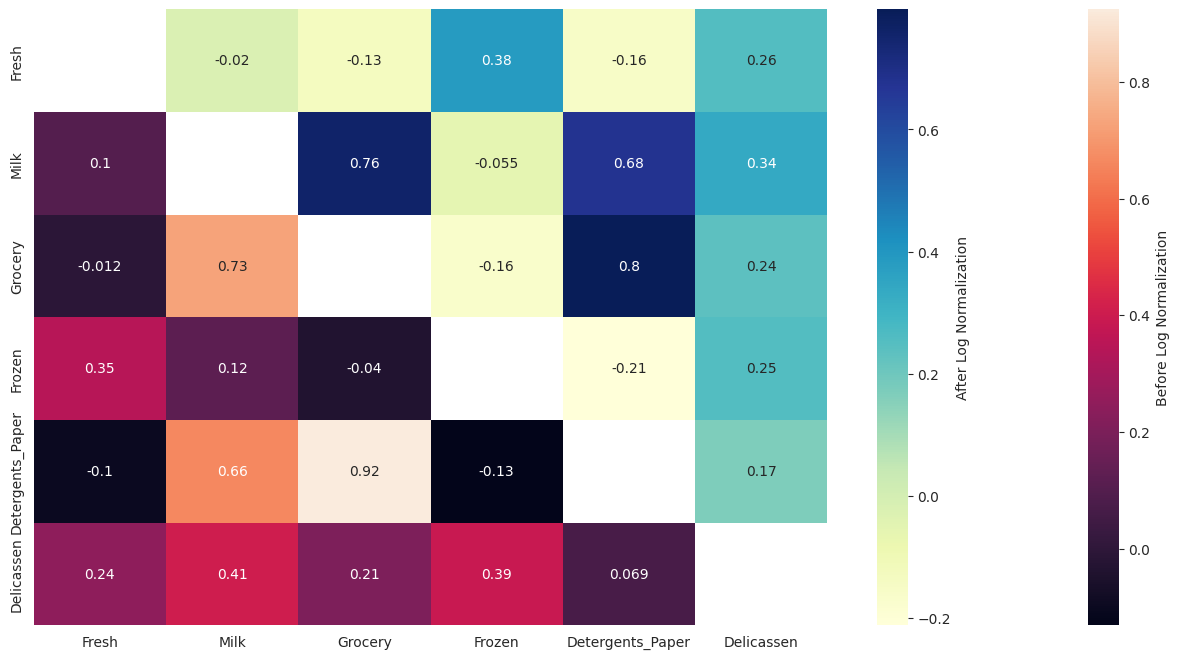

In [ ]:
log_corr = log_data.corr()

f = plt.figure(figsize = (16,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(corr, annot=True, mask=mask, cbar_kws={'label': 'Before Log Normalization'})

mask2 = np.zeros_like(corr)
mask2[np.tril_indices_from(mask2)] = True
with sns.axes_style("white"):
    ax2 = sns.heatmap(log_corr, annot=True, mask=mask2, cmap="YlGnBu", cbar_kws={'label': 'After Log Normalization'})

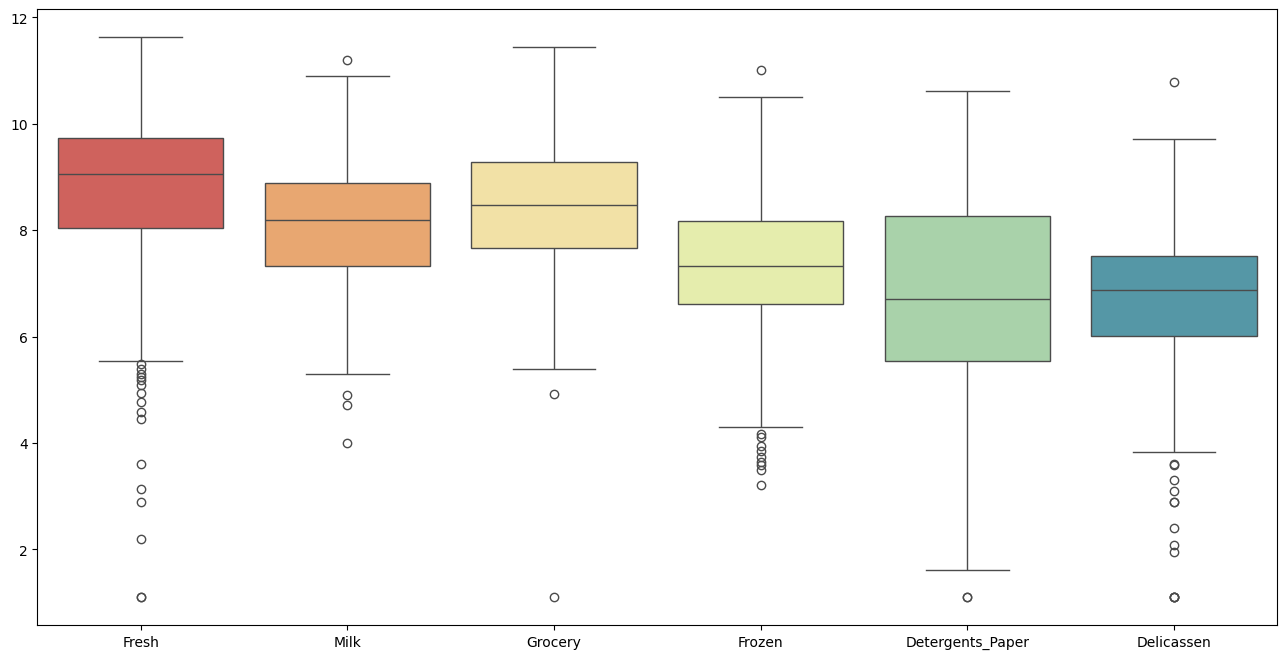

In [ ]:
plt.figure(figsize = (16,8))
_ = sns.boxplot(data=log_data, palette="Spectral")

####Outlier Detection

In [ ]:
outliers_list = []
for feature in log_data.keys():

    Q1 = np.percentile(log_data[feature], 25)
    Q3 = np.percentile(log_data[feature], 75)

    step = (Q3 - Q1) * 1.5

    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers = list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.values)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers_list.extend(outliers)

print("List of Outliers -> {}".format(outliers_list))
duplicate_outliers_list = list(set([x for x in outliers_list if outliers_list.count(x) >= 2]))
duplicate_outliers_list.sort()
print("\nList of Common Outliers -> {}".format(duplicate_outliers_list))

outliers  = duplicate_outliers_list

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


List of Outliers -> [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

List of Common Outliers -> [65, 66, 75, 128, 154]


###Features Dimensionality

Explained Variance Ratio => [0.44302505 0.26379218 0.1230638  0.10120908 0.04850196 0.02040793]

Explained Variance Ratio(csum) => [0.44302505 0.70681723 0.82988103 0.93109011 0.97959207 1.        ]



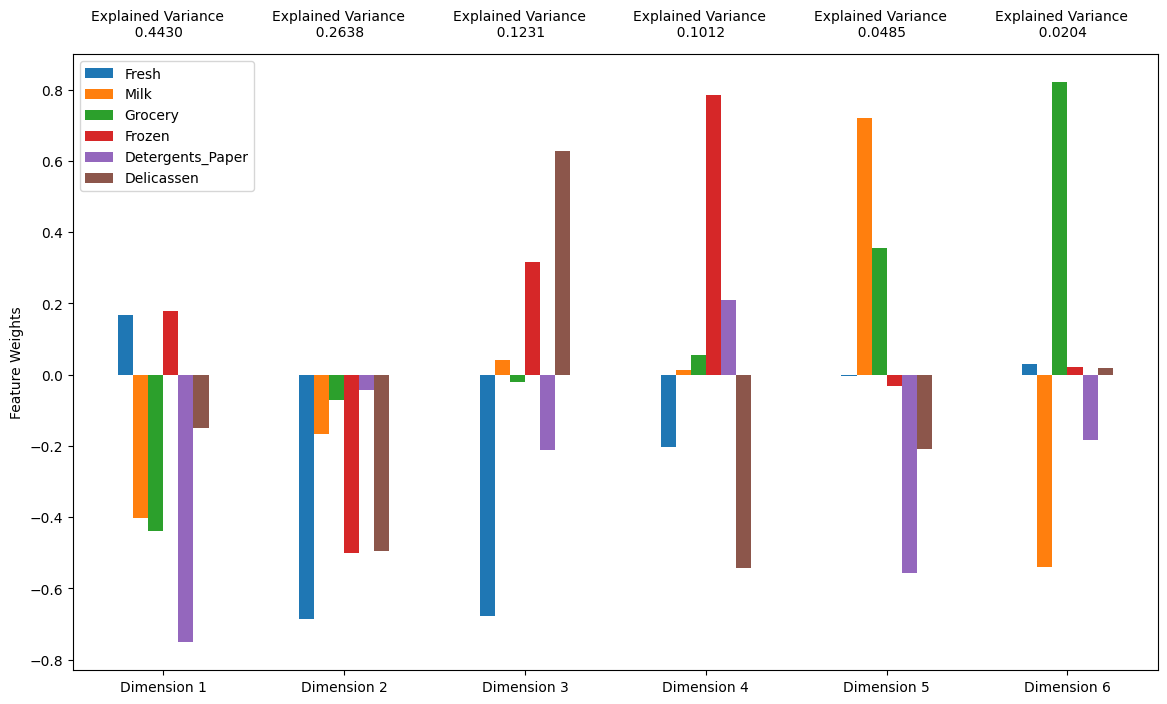

In [ ]:
pca = PCA(n_components = 6, random_state=0)
pca.fit(good_data)

pca_samples = pca.transform(log_samples)
print("Explained Variance Ratio => {}\n".format(pca.explained_variance_ratio_))
print("Explained Variance Ratio(csum) => {}\n".format(pca.explained_variance_ratio_.cumsum()))

dimensions = ['Dimension {}'.format(i) for i in range(1, 7)]

components = pd.DataFrame(np.round(pca.components_, 4), columns=good_data.columns)
components.index = dimensions

ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=['Explained Variance'])
variance_ratios.index = dimensions

fig, ax = plt.subplots(figsize=(14, 8))

components.plot(ax=ax, kind='bar')
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)

for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i - 0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f" % (ev))

pca_results = pd.concat([variance_ratios, components], axis=1)
plt.show()

In [ ]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.8945,0.7590,-0.5690,-2.0042,-0.2323,-0.0747
1,-2.8734,-0.6774,0.1330,-0.1802,-0.0250,0.1224
2,1.4618,-0.6911,-0.5149,-2.4331,2.5394,-0.1115


In [ ]:
pca = PCA(n_components = 2, random_state=0)
pca.fit(good_data)

reduced_data = pca.transform(good_data)

pca_samples = pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [ ]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.8945,0.7590
1,-2.8734,-0.6774
2,1.4618,-0.6911


###Clustering

####Kmeans

In [ ]:
for no_clusters in range(2,15):
    clusterer_1 = KMeans(n_clusters=no_clusters, random_state=0)
    clusterer_1.fit(reduced_data)

    preds_1 = clusterer_1.predict(reduced_data)

    score = silhouette_score(reduced_data, preds_1)
    print("silhouette coefficient for `{}` clusters => {:.4f}".format(no_clusters, score))

silhouette coefficient for `2` clusters => 0.4263
silhouette coefficient for `3` clusters => 0.3969
silhouette coefficient for `4` clusters => 0.3320
silhouette coefficient for `5` clusters => 0.3510
silhouette coefficient for `6` clusters => 0.3666
silhouette coefficient for `7` clusters => 0.3633
silhouette coefficient for `8` clusters => 0.3510
silhouette coefficient for `9` clusters => 0.3541
silhouette coefficient for `10` clusters => 0.3510
silhouette coefficient for `11` clusters => 0.3519
silhouette coefficient for `12` clusters => 0.3509
silhouette coefficient for `13` clusters => 0.3596
silhouette coefficient for `14` clusters => 0.3611


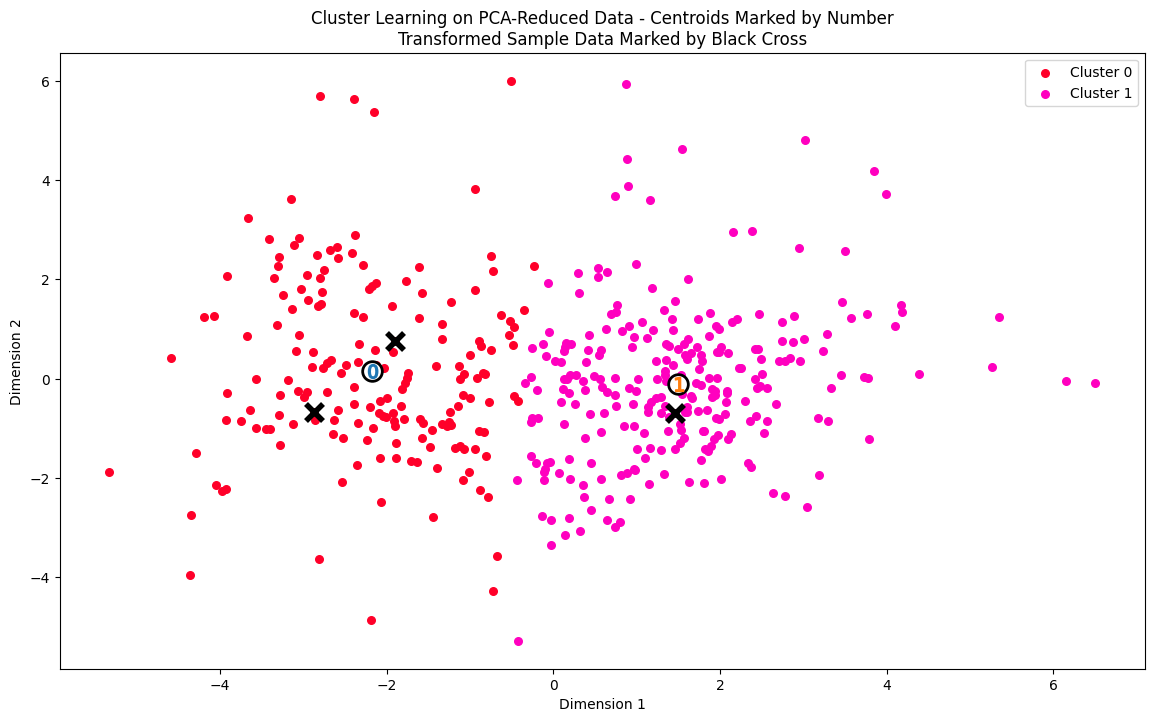

In [ ]:
clusterer = KMeans(n_clusters = 2)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

predictions = pd.DataFrame(preds, columns=['Cluster'])
plot_data = pd.concat([predictions, reduced_data], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))

cmap = cm.get_cmap('gist_rainbow')

for i, cluster in plot_data.groupby('Cluster'):
    cluster.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                 color=cmap((i) * 1.0 / (len(centers) - 1)), label='Cluster %i' % (i), s=30)

for i, c in enumerate(centers):
    ax.scatter(x=c[0], y=c[1], color='white', edgecolors='black',
               alpha=1, linewidth=2, marker='o', s=200)
    ax.scatter(x=c[0], y=c[1], marker='$%d$' % (i), alpha=1, s=100)

ax.scatter(x=pca_samples[:, 0], y=pca_samples[:, 1],
           s=150, linewidth=4, color='black', marker='x')

ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross")

plt.show()

In [ ]:
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


In [ ]:
df.mean(axis=0)

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [ ]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6137,5360,8040,129,3084,1603
1,6006,11093,18881,1159,7425,2098
2,30379,13252,5189,321,51,1450


In [ ]:
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


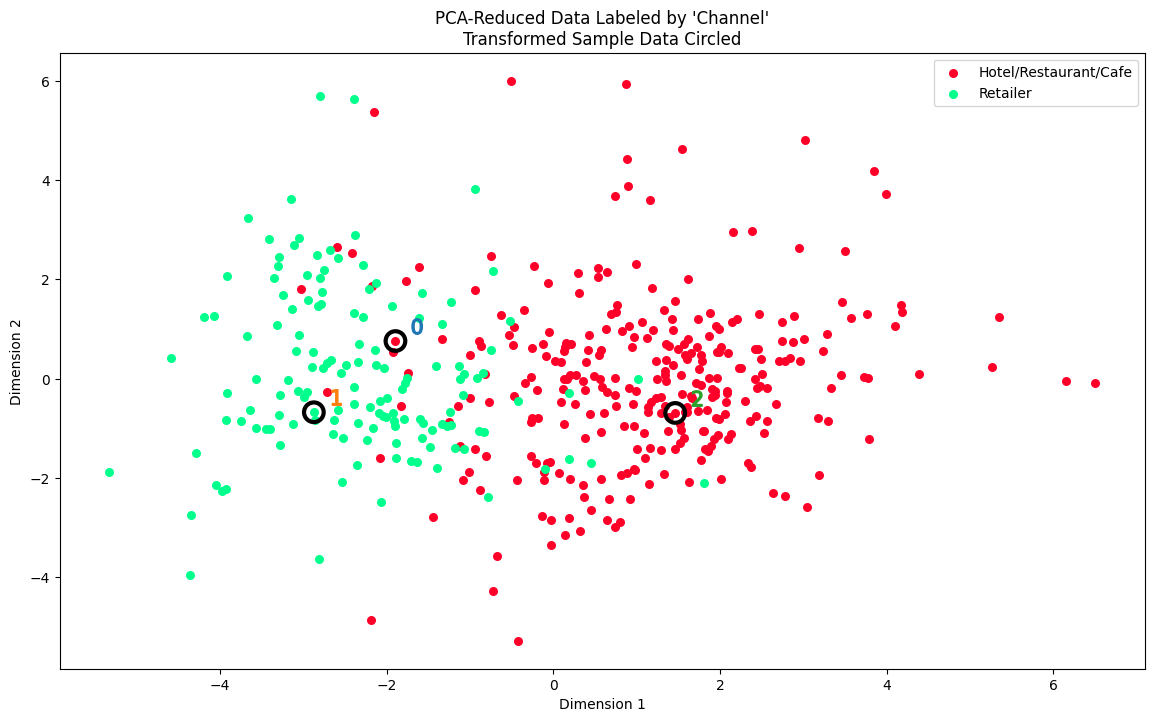

In [ ]:
channel = pd.DataFrame(df['Channel'], columns=['Channel'])
channel = channel.drop(channel.index[outliers]).reset_index(drop=True)
labeled = pd.concat([reduced_data, channel], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))

cmap = cm.get_cmap('gist_rainbow')

labels = ['Hotel/Restaurant/Cafe', 'Retailer']
grouped = labeled.groupby('Channel')
for i, channel_data in grouped:
    channel_data.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                      color=cmap((i - 1) * 1.0 / 2), label=labels[i - 1], s=30)

for i, sample in enumerate(pca_samples):
    ax.scatter(x=sample[0], y=sample[1],
               s=200, linewidth=3, color='black', marker='o', facecolors='none')
    ax.scatter(x=sample[0] + 0.25, y=sample[1] + 0.3, marker='$%d$' % (i), alpha=1, s=125)

ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled")

plt.show()

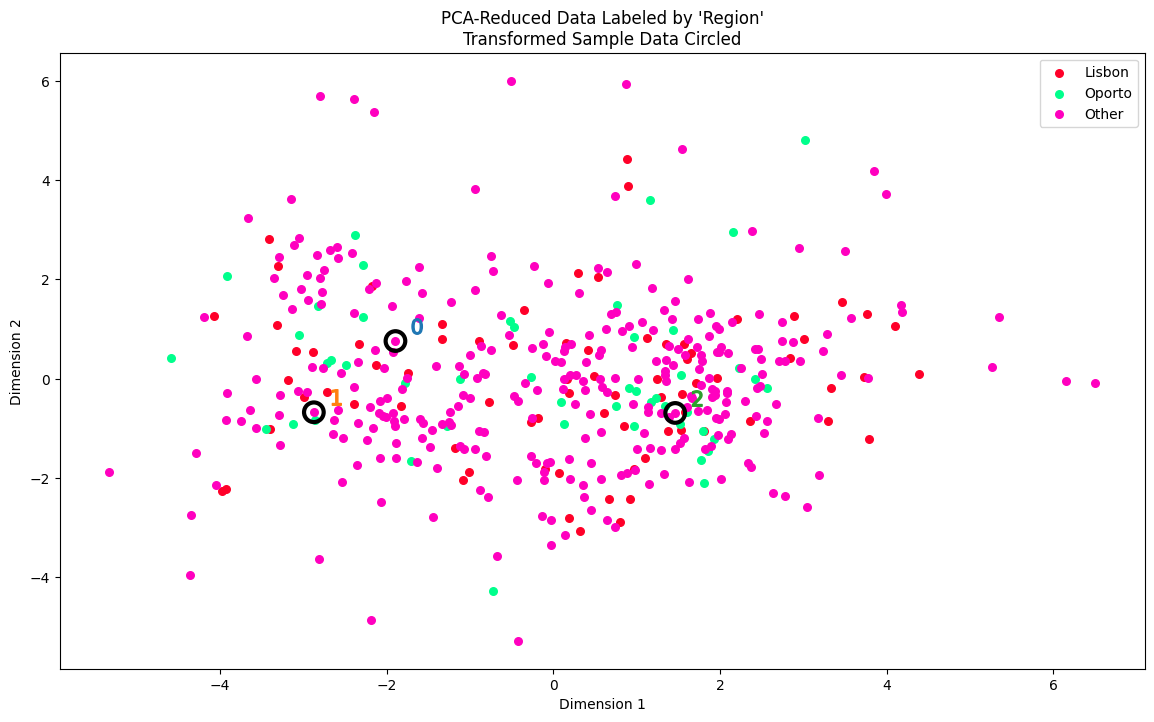

In [ ]:
region = pd.DataFrame(df['Region'], columns=['Region'])
region = region.drop(region.index[outliers]).reset_index(drop=True)
labeled = pd.concat([reduced_data, region], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))

cmap = cm.get_cmap('gist_rainbow')

labels = ['Lisbon', 'Oporto', 'Other']
grouped = labeled.groupby('Region')
for i, region_data in grouped:
    region_data.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                     color=cmap((i - 1) * 1.0 / 2), label=labels[i - 1], s=30)

for i, sample in enumerate(pca_samples):
    ax.scatter(x=sample[0], y=sample[1],
               s=200, linewidth=3, color='black', marker='o', facecolors='none')
    ax.scatter(x=sample[0] + 0.25, y=sample[1] + 0.3, marker='$%d$' % (i), alpha=1, s=125)

ax.set_title("PCA-Reduced Data Labeled by 'Region'\nTransformed Sample Data Circled")

plt.show()


####DBSCAN

In [ ]:
min_samples_range = range(2, 10)
eps_range = [0.1, 0.5, 1.0, 1.5]

for min_samples in min_samples_range:
    for eps in eps_range:
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        preds = clusterer.fit_predict(reduced_data)

        if len(set(preds)) > 1:
            score = silhouette_score(reduced_data, preds)
            print("Silhouette coefficient for min_samples={}, eps={} => {:.4f}".format(min_samples, eps, score))
        else:
            print("Unable to compute silhouette coefficient for min_samples={}, eps={}".format(min_samples, eps))

Silhouette coefficient for min_samples=2, eps=0.1 => -0.4007
Silhouette coefficient for min_samples=2, eps=0.5 => -0.2386
Silhouette coefficient for min_samples=2, eps=1.0 => 0.1876
Silhouette coefficient for min_samples=2, eps=1.5 => 0.4560
Silhouette coefficient for min_samples=3, eps=0.1 => -0.5644
Silhouette coefficient for min_samples=3, eps=0.5 => -0.2082
Silhouette coefficient for min_samples=3, eps=1.0 => 0.1895
Silhouette coefficient for min_samples=3, eps=1.5 => 0.4560
Silhouette coefficient for min_samples=4, eps=0.1 => -0.3950
Silhouette coefficient for min_samples=4, eps=0.5 => -0.0984
Silhouette coefficient for min_samples=4, eps=1.0 => 0.2046
Silhouette coefficient for min_samples=4, eps=1.5 => 0.4630
Unable to compute silhouette coefficient for min_samples=5, eps=0.1
Silhouette coefficient for min_samples=5, eps=0.5 => 0.0118
Silhouette coefficient for min_samples=5, eps=1.0 => 0.3000
Silhouette coefficient for min_samples=5, eps=1.5 => 0.4642
Unable to compute silhouet

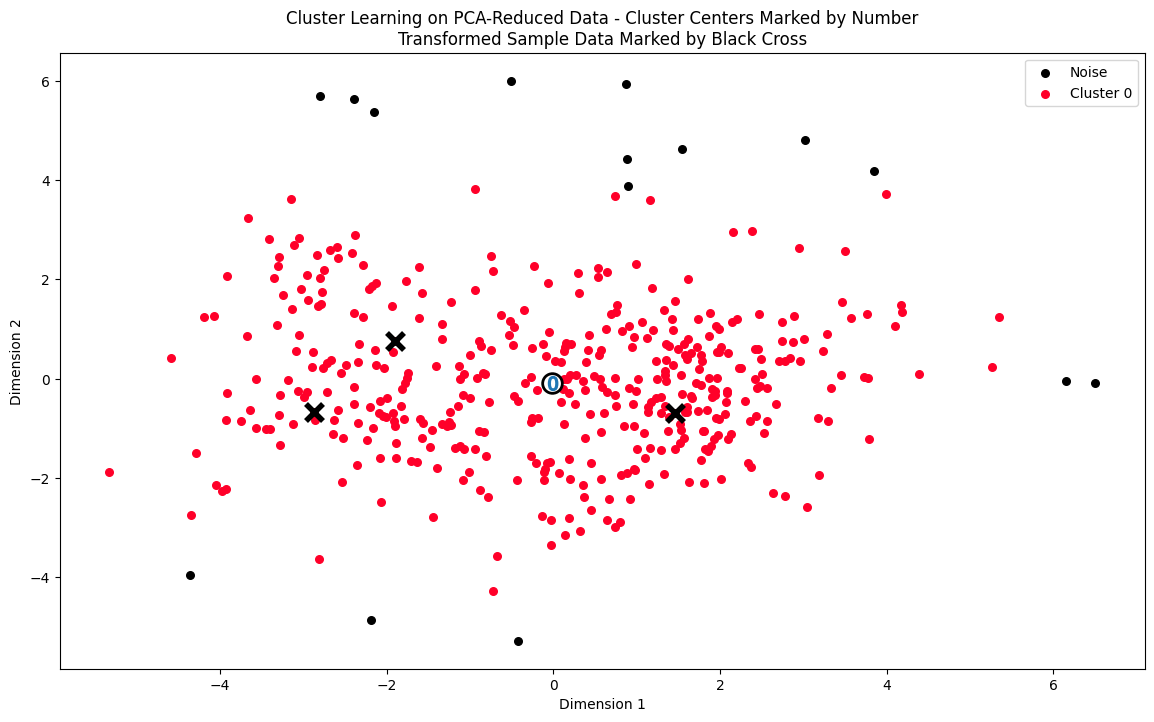

In [ ]:
clusterer = DBSCAN(eps=eps, min_samples=min_samples)
preds = clusterer.fit_predict(reduced_data)

centers = [np.mean(reduced_data[preds == label], axis=0) for label in np.unique(preds) if label != -1]

sample_preds = clusterer.fit_predict(pca_samples)

predictions = pd.DataFrame(preds, columns=['Cluster'])

plot_data = pd.concat([predictions, reduced_data], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))
cmap = cm.get_cmap('gist_rainbow')

for i, cluster in plot_data.groupby('Cluster'):
    if i != -1:
        cluster.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                     color=cmap((i) * 1.0 / len(np.unique(preds))), label='Cluster %i' % (i), s=30)
    else:
        cluster.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                     color='black', label='Noise', s=30)

for i, center in enumerate(centers):
    ax.scatter(x=center[0], y=center[1], color='white', edgecolors='black',
               alpha=1, linewidth=2, marker='o', s=200)
    ax.scatter(x=center[0], y=center[1], marker='$%d$' % (i), alpha=1, s=100)

ax.scatter(x=pca_samples[:, 0], y=pca_samples[:, 1],
           s=150, linewidth=4, color='black', marker='x')

ax.set_title("Cluster Learning on PCA-Reduced Data - Cluster Centers Marked by Number\nTransformed Sample Data Marked by Black Cross")
plt.show()

In [ ]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=df.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,6785.0,3468.0,4797.0,1578.0,915.0,846.0


In [ ]:
df.mean(axis=0)

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [ ]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6137,5360,8040,129,3084,1603
1,6006,11093,18881,1159,7425,2098
2,30379,13252,5189,321,51,1450


In [ ]:
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster -1
Sample point 1 predicted to be in Cluster -1
Sample point 2 predicted to be in Cluster -1


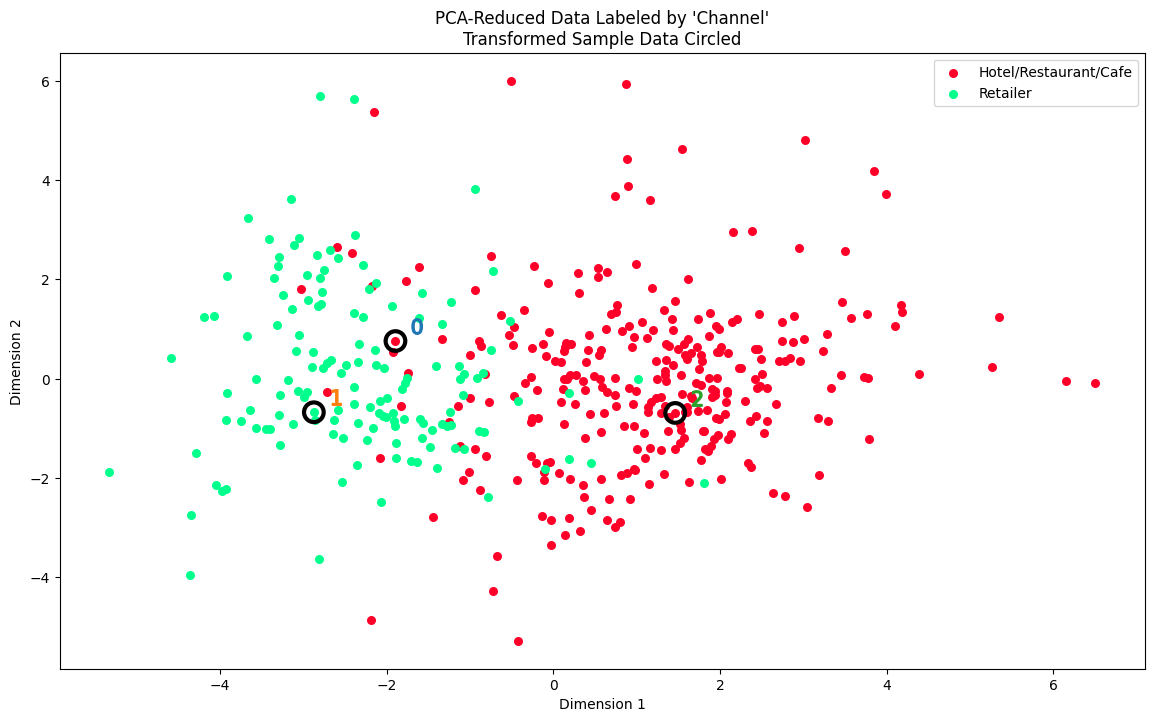

In [ ]:
channel = pd.DataFrame(df['Channel'], columns=['Channel'])
channel = channel.drop(channel.index[outliers]).reset_index(drop=True)
labeled = pd.concat([reduced_data, channel], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))

cmap = cm.get_cmap('gist_rainbow')

labels = ['Hotel/Restaurant/Cafe', 'Retailer']
grouped = labeled.groupby('Channel')
for i, channel_data in grouped:
    channel_data.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                      color=cmap((i - 1) * 1.0 / 2), label=labels[i - 1], s=30)

for i, sample in enumerate(pca_samples):
    ax.scatter(x=sample[0], y=sample[1],
               s=200, linewidth=3, color='black', marker='o', facecolors='none')
    ax.scatter(x=sample[0] + 0.25, y=sample[1] + 0.3, marker='$%d$' % (i), alpha=1, s=125)

ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled")

plt.show()

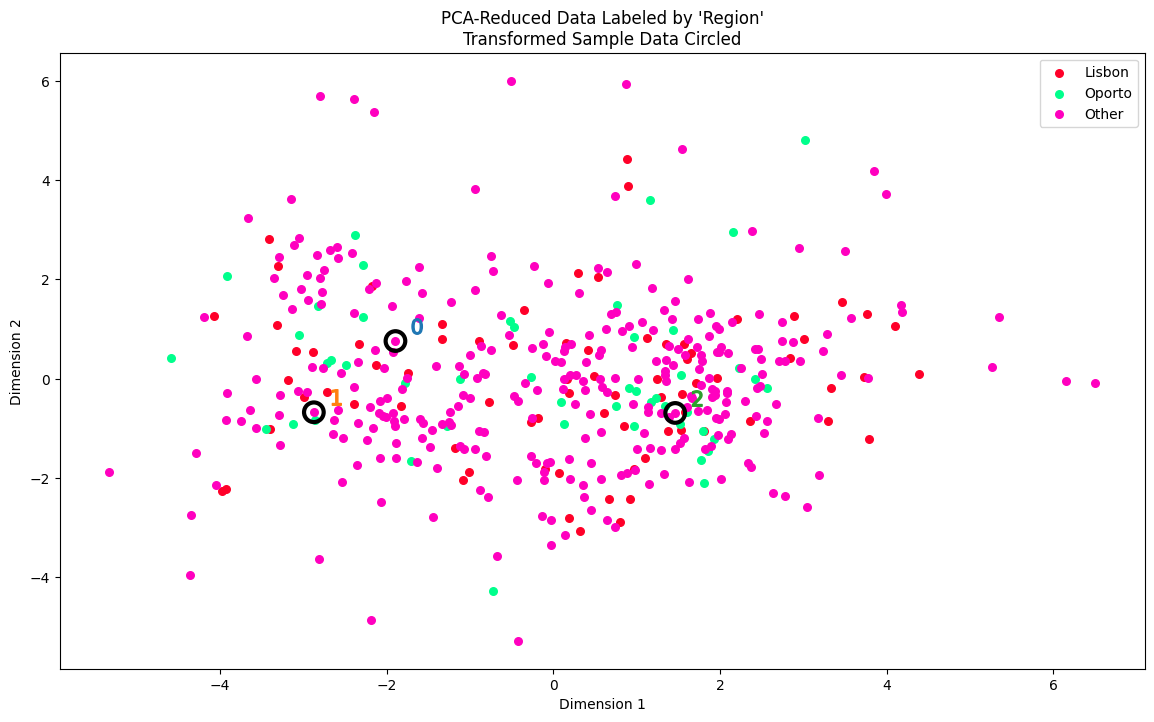

In [ ]:
region = pd.DataFrame(df['Region'], columns=['Region'])
region = region.drop(region.index[outliers]).reset_index(drop=True)
labeled = pd.concat([reduced_data, region], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))

cmap = cm.get_cmap('gist_rainbow')

labels = ['Lisbon', 'Oporto', 'Other']
grouped = labeled.groupby('Region')
for i, region_data in grouped:
    region_data.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                     color=cmap((i - 1) * 1.0 / 2), label=labels[i - 1], s=30)

for i, sample in enumerate(pca_samples):
    ax.scatter(x=sample[0], y=sample[1],
               s=200, linewidth=3, color='black', marker='o', facecolors='none')
    ax.scatter(x=sample[0] + 0.25, y=sample[1] + 0.3, marker='$%d$' % (i), alpha=1, s=125)

ax.set_title("PCA-Reduced Data Labeled by 'Region'\nTransformed Sample Data Circled")

plt.show()


####Hierarchical

Silhouette coefficient for `2` clusters => 0.3751
Silhouette coefficient for `3` clusters => 0.3601
Silhouette coefficient for `4` clusters => 0.2716
Silhouette coefficient for `5` clusters => 0.2825
Silhouette coefficient for `6` clusters => 0.3073
Silhouette coefficient for `7` clusters => 0.3129
Silhouette coefficient for `8` clusters => 0.3185
Silhouette coefficient for `9` clusters => 0.3104
Silhouette coefficient for `10` clusters => 0.3206
Silhouette coefficient for `11` clusters => 0.3207
Silhouette coefficient for `12` clusters => 0.3145
Silhouette coefficient for `13` clusters => 0.3172
Silhouette coefficient for `14` clusters => 0.3216


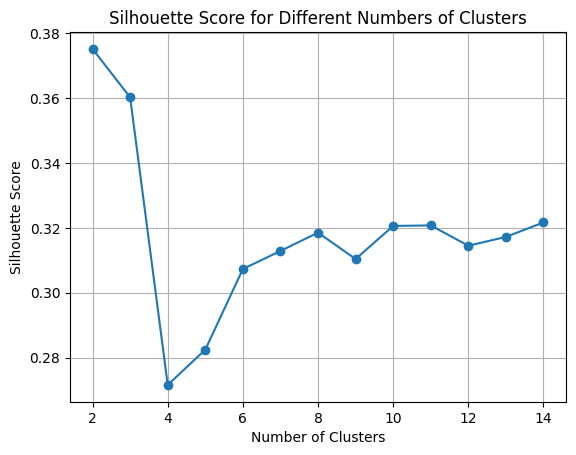

In [ ]:
silhouette_scores = []
linkage_matrices = []

for no_clusters in range(2, 15):
    clusterer = AgglomerativeClustering(n_clusters=no_clusters, affinity='euclidean', linkage='ward')
    preds = clusterer.fit_predict(reduced_data)

    score = silhouette_score(reduced_data, preds)
    silhouette_scores.append(score)

    linkage_matrix = sch.linkage(reduced_data, method='ward')
    linkage_matrices.append(linkage_matrix)

    print("Silhouette coefficient for `{}` clusters => {:.4f}".format(no_clusters, score))

num_plots = len(linkage_matrices)
num_rows = (num_plots + 2) // 3
num_cols = min(num_plots, 3)

plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

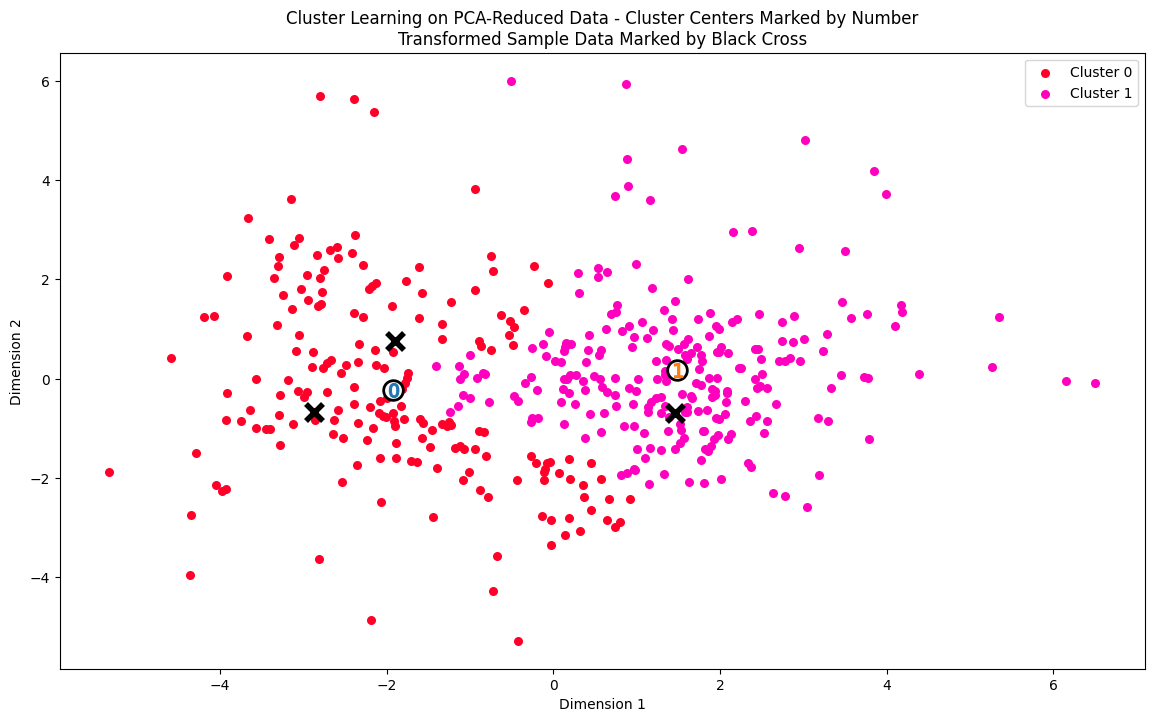

In [ ]:
clusterer = AgglomerativeClustering(n_clusters=2)
preds = clusterer.fit_predict(reduced_data)

centers = [np.mean(reduced_data[preds == label], axis=0) for label in np.unique(preds)]

sample_preds = clusterer.fit_predict(pca_samples)

predictions = pd.DataFrame(preds, columns=['Cluster'])

plot_data = pd.concat([predictions, reduced_data], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))
cmap = cm.get_cmap('gist_rainbow')

for i, cluster in plot_data.groupby('Cluster'):
    cluster.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                 color=cmap((i) * 1.0 / (len(cluster_centers) - 1)), label='Cluster %i' % (i), s=30)

for i, center in enumerate(cluster_centers):
    ax.scatter(x=center[0], y=center[1], color='white', edgecolors='black',
               alpha=1, linewidth=2, marker='o', s=200)
    ax.scatter(x=center[0], y=center[1], marker='$%d$' % (i), alpha=1, s=100)

ax.scatter(x=pca_samples[:, 0], y=pca_samples[:, 1],
           s=150, linewidth=4, color='black', marker='x')

ax.set_title("Cluster Learning on PCA-Reduced Data - Cluster Centers Marked by Number\nTransformed Sample Data Marked by Black Cross")
plt.show()

In [ ]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=df.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,5419.0,7601.0,11123.0,1204.0,3830.0,1202.0
Segment 1,7315.0,1812.0,2431.0,1815.0,291.0,594.0


In [ ]:
df.mean(axis=0)

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [ ]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6137,5360,8040,129,3084,1603
1,6006,11093,18881,1159,7425,2098
2,30379,13252,5189,321,51,1450


In [ ]:
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


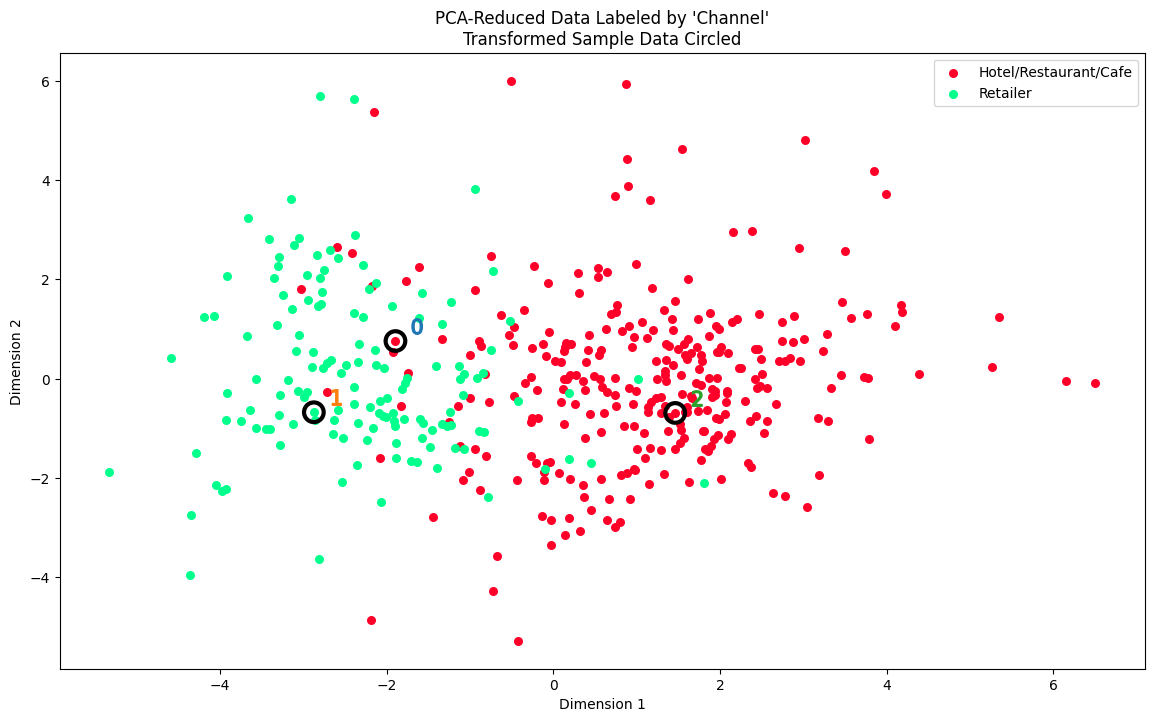

In [ ]:
channel = pd.DataFrame(df['Channel'], columns=['Channel'])
channel = channel.drop(channel.index[outliers]).reset_index(drop=True)
labeled = pd.concat([reduced_data, channel], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))

cmap = cm.get_cmap('gist_rainbow')

labels = ['Hotel/Restaurant/Cafe', 'Retailer']
grouped = labeled.groupby('Channel')
for i, channel_data in grouped:
    channel_data.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                      color=cmap((i - 1) * 1.0 / 2), label=labels[i - 1], s=30)

for i, sample in enumerate(pca_samples):
    ax.scatter(x=sample[0], y=sample[1],
               s=200, linewidth=3, color='black', marker='o', facecolors='none')
    ax.scatter(x=sample[0] + 0.25, y=sample[1] + 0.3, marker='$%d$' % (i), alpha=1, s=125)

ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled")

plt.show()

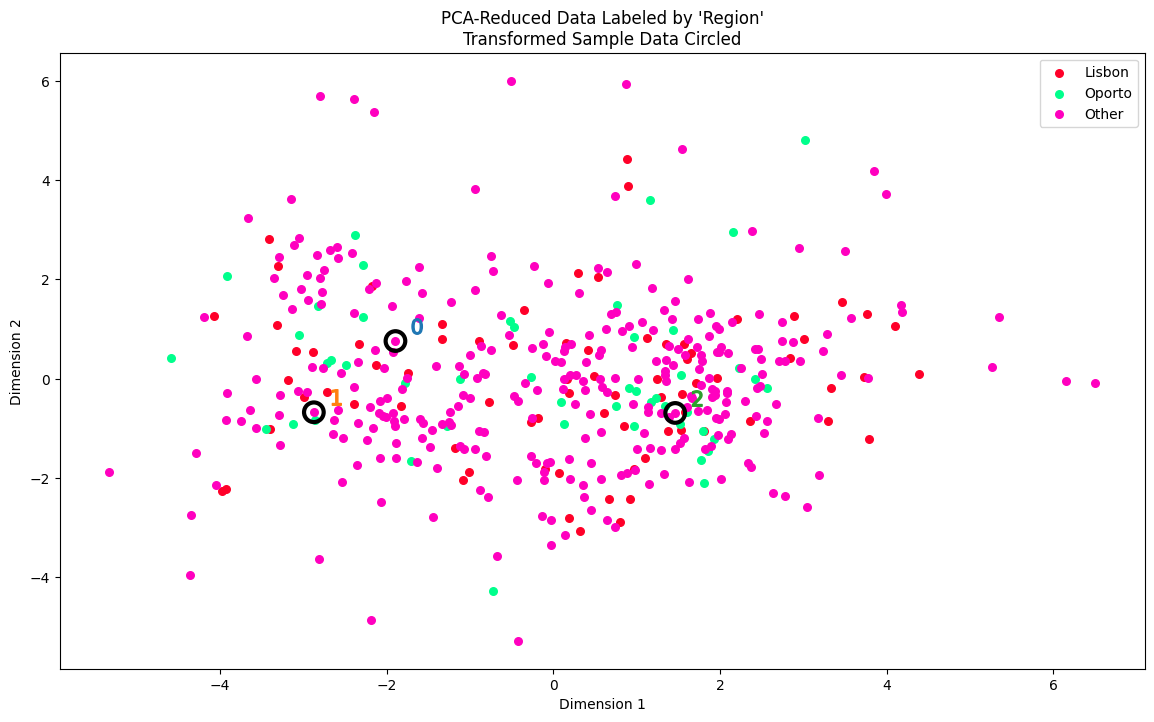

In [ ]:
region = pd.DataFrame(df['Region'], columns=['Region'])
region = region.drop(region.index[outliers]).reset_index(drop=True)
labeled = pd.concat([reduced_data, region], axis=1)

fig, ax = plt.subplots(figsize=(14, 8))

cmap = cm.get_cmap('gist_rainbow')

labels = ['Lisbon', 'Oporto', 'Other']
grouped = labeled.groupby('Region')
for i, region_data in grouped:
    region_data.plot(ax=ax, kind='scatter', x='Dimension 1', y='Dimension 2',
                     color=cmap((i - 1) * 1.0 / 2), label=labels[i - 1], s=30)

for i, sample in enumerate(pca_samples):
    ax.scatter(x=sample[0], y=sample[1],
               s=200, linewidth=3, color='black', marker='o', facecolors='none')
    ax.scatter(x=sample[0] + 0.25, y=sample[1] + 0.3, marker='$%d$' % (i), alpha=1, s=125)

ax.set_title("PCA-Reduced Data Labeled by 'Region'\nTransformed Sample Data Circled")

plt.show()
